In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [532]:
#Import Earthquake Dataset into pandas Dataframe
earthquake_df=pd.read_csv("database.csv",parse_dates=[['Date','Time']])
earthquake_df.head()

,Date_Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965 13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965 11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965 18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965 18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965 13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [533]:
earthquake_df.shape

(23412, 20)

In [534]:
earthquake_df.columns

Index(['Date_Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [535]:
from datetime import datetime
earthquake_df['Date_Time']=pd.to_datetime(earthquake_df['Date_Time'],infer_datetime_format=True,errors='coerce')

In [536]:
print(earthquake_df.dtypes)

Date_Time                     datetime64[ns]
Latitude                             float64
Longitude                            float64
Type                                  object
Depth                                float64
Depth Error                          float64
Depth Seismic Stations               float64
Magnitude                            float64
Magnitude Type                        object
Magnitude Error                      float64
Magnitude Seismic Stations           float64
Azimuthal Gap                        float64
Horizontal Distance                  float64
Horizontal Error                     float64
Root Mean Square                     float64
ID                                    object
Source                                object
Location Source                       object
Magnitude Source                      object
Status                                object
dtype: object


In [537]:
#Identify Missing Values in Each Column
earthquake_df.isna().sum()

Date_Time                         3
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [538]:
#Drop Columns with Large Number of Missing Values
earthquake=earthquake_df[['Date_Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status']]

In [539]:
earthquake.head()

,Date_Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [540]:
earthquake.shape

(23412, 12)

In [541]:
#Identify Remaining Missing Values in Columns
earthquake.isna().sum()

Date_Time           3
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [542]:
#Drop Remaining Number of Rows with Missing Values
earthquake=earthquake.dropna()
earthquake.shape

(23406, 12)

In [543]:
#Calculate Average Earthquake Magnitude
earthquake['Magnitude'].mean()

5.882580962146458

In [544]:
#Identify Unique Causes of Earthquake's Measured
earthquake['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [545]:
earthquake['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', 'MWB', 'MWW', 'MWR'],
      dtype=object)

In [546]:
earthquake['Magnitude Type'].isna().sum()

0

In [547]:
earthquake[earthquake['Magnitude Type'].isna()]

,Date_Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status


In [548]:
earthquake.head()

,Date_Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [549]:
#Observe Categorical Distributions

In [550]:
earthquake['Type'].value_counts()

Earthquake           23226
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

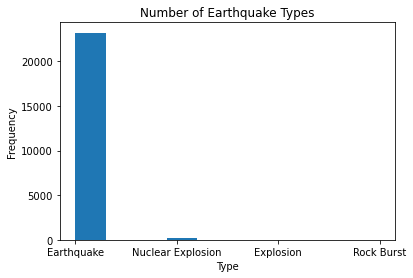

In [551]:
import seaborn as sns
#plot=sns.FacetGrid(earthquake,col='Type',margin_titles=True)
#plot.map(plt.hist,'Type')

ax=plt.axes()
ax.hist(earthquake['Type']);
ax.set(xlabel='Type',ylabel='Frequency', title='Number of Earthquake Types');


In [552]:
earthquake['Magnitude Type'].value_counts()

MW     7721
MWC    5668
MB     3760
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64

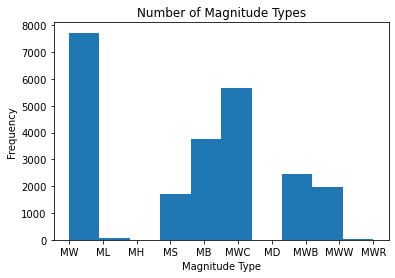

In [553]:
ax=plt.axes()
ax.hist(earthquake['Magnitude Type']);
ax.set(xlabel='Magnitude Type',ylabel='Frequency',title='Number of Magnitude Types');

In [554]:
earthquake['Source'].value_counts()

US           20627
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
SE               1
PR               1
Name: Source, dtype: int64

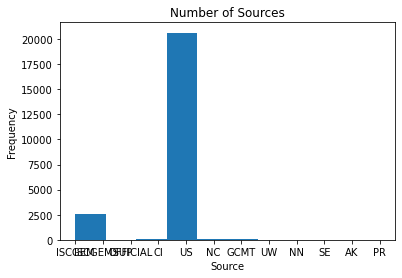

In [555]:
ax=plt.axes()
ax.hist(earthquake['Source']);
ax.set(xlabel='Source',ylabel='Frequency',title='Number of Sources');

In [556]:
earthquake['Location Source'].value_counts()

US        20347
ISCGEM     2581
CI           61
GCMT         56
NC           54
GUC          46
AEIC         40
UNM          21
PGC          19
WEL          18
AGS          17
ISK          15
AK           14
ATH          14
HVO          12
SPE          10
ROM           7
AEI           7
TEH           7
H             7
UW            6
NN            4
CASC          4
US_WEL        4
THR           3
THE           3
RSPR          3
JMA           3
G             2
MDD           2
B             2
TUL           2
SE            1
LIM           1
TAP           1
UCR           1
BRK           1
CSEM          1
BEO           1
SJA           1
CAR           1
U             1
AG            1
OTT           1
SLC           1
BOU           1
PR            1
Name: Location Source, dtype: int64

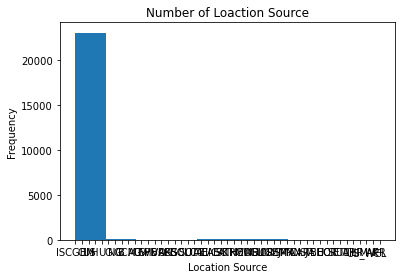

In [557]:
#from matplotlib.pyplot import figure
ax=plt.axes()
ax.hist(earthquake['Location Source']);
ax.set(xlabel='Location Source',ylabel='Frequency',title='Number of Loaction Source');
#plt.figure(figsize=(200,200));

In [558]:
earthquake['Magnitude Source'].value_counts()

US          10457
HRV          8222
ISCGEM       2580
GCMT         1488
NC            533
CI             61
AK             12
PAR             9
OFFICIAL        8
UW              6
GUC             6
NIED            4
NN              4
1000            3
US_GCMT         3
BRK             2
PGC             2
1009            1
SE              1
US_PGC          1
1020            1
PR              1
1023            1
Name: Magnitude Source, dtype: int64

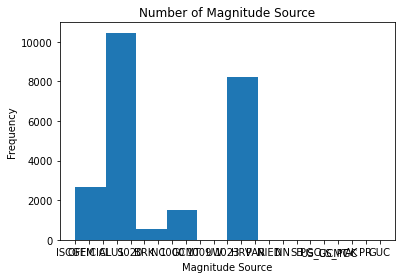

In [559]:
ax=plt.axes()
ax.hist(earthquake['Magnitude Source']);
ax.set(xlabel='Magnitude Source',ylabel='Frequency',title='Number of Magnitude Source');

In [560]:
earthquake['Status'].value_counts()

Reviewed     20770
Automatic     2636
Name: Status, dtype: int64

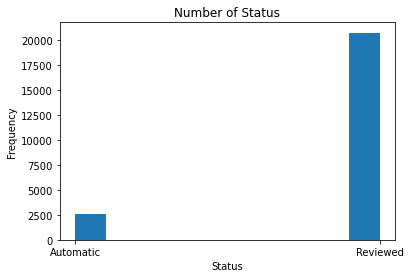

In [561]:
ax=plt.axes()
ax.hist(earthquake['Status']);
ax.set(xlabel='Status',ylabel='Frequency',title='Number of Status');

In [562]:
#View Statistics
#Visualize Outliers

In [563]:
earthquake.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,23406.0,1.674051,30.112429,-77.080,-18.655000,-3.5725,26.15500,86.005
Longitude,23406.0,39.657409,125.509623,-179.997,-76.316325,103.9880,145.03075,179.998
Depth,23406.0,70.756308,122.611677,-1.100,14.552500,33.0000,54.00000,700.000
Magnitude,23406.0,5.882581,0.423106,5.500,5.600000,5.7000,6.00000,9.100


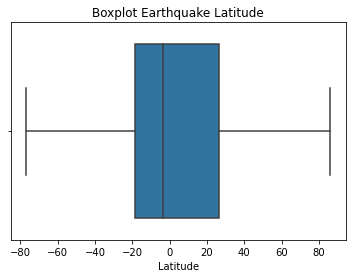

In [564]:
ax=sns.boxplot(x=earthquake['Latitude'])
ax.set(title='Boxplot Earthquake Latitude');

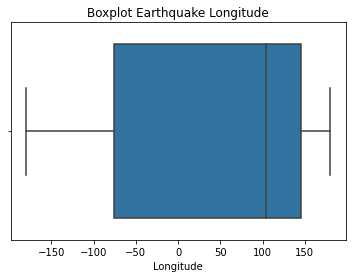

In [565]:
ax=sns.boxplot(x=earthquake['Longitude'])
ax.set(title='Boxplot Earthquake Longitude');

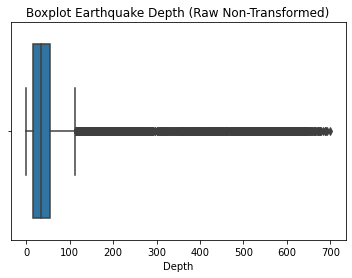

In [566]:
ax=sns.boxplot(x=earthquake['Depth'])
ax.set(title='Boxplot Earthquake Depth (Raw Non-Transformed)');

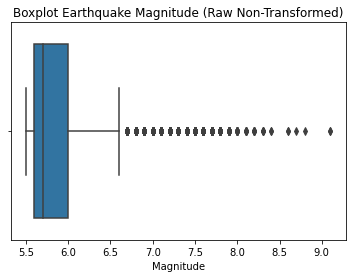

In [567]:
ax=sns.boxplot(x=earthquake['Magnitude'])
ax.set(title='Boxplot Earthquake Magnitude (Raw Non-Transformed)');

In [568]:
print(earthquake.columns)
print(earthquake.dtypes)
earthquake.head()

Index(['Date_Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude',
       'Magnitude Type', 'ID', 'Source', 'Location Source', 'Magnitude Source',
       'Status'],
      dtype='object')
Date_Time           datetime64[ns]
Latitude                   float64
Longitude                  float64
Type                        object
Depth                      float64
Magnitude                  float64
Magnitude Type              object
ID                          object
Source                      object
Location Source             object
Magnitude Source            object
Status                      object
dtype: object


,Date_Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [569]:
import seaborn as sns

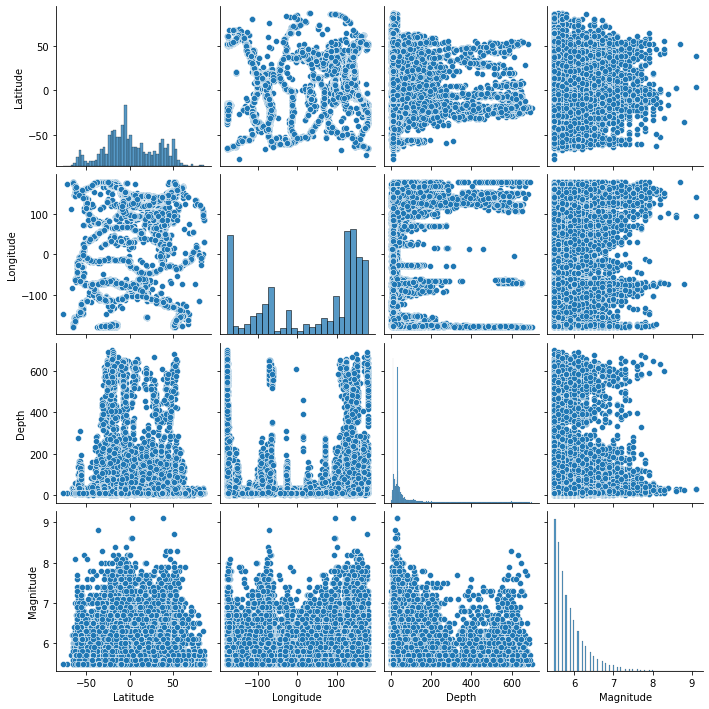

In [570]:
ax=sns.pairplot(earthquake)

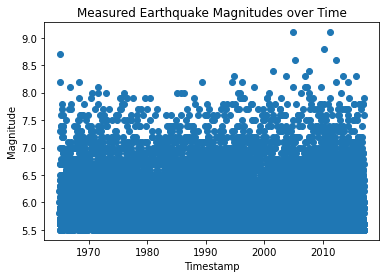

In [571]:
ax=plt.axes()
ax.scatter(earthquake.Date_Time,earthquake.Magnitude,marker='o',label='Type');
ax.set(xlabel='Timestamp',ylabel='Magnitude',title='Measured Earthquake Magnitudes over Time');

In [572]:
eq=earthquake_df[['Date_Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude']]

In [573]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = eq.dtypes[eq.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

eq[one_hot_encode_cols].head().T

,0,1,2,3,4
Type,Earthquake,Earthquake,Earthquake,Earthquake,Earthquake


In [574]:
eq.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,23412.0,1.679033,30.113183,-77.080,-18.65300,-3.5685,26.19075,86.005
Longitude,23412.0,39.639961,125.511959,-179.997,-76.34975,103.9820,145.02625,179.998
Depth,23412.0,70.767911,122.651898,-1.100,14.52250,33.0000,54.00000,700.000
Magnitude,23412.0,5.882531,0.423066,5.500,5.60000,5.7000,6.00000,9.100


In [575]:
eq = pd.get_dummies(eq, columns=one_hot_encode_cols, drop_first=True)
eq.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,23412.0,1.679033,30.113183,-77.080,-18.65300,-3.5685,26.19075,86.005
Longitude,23412.0,39.639961,125.511959,-179.997,-76.34975,103.9820,145.02625,179.998
Depth,23412.0,70.767911,122.651898,-1.100,14.52250,33.0000,54.00000,700.000
Magnitude,23412.0,5.882531,0.423066,5.500,5.60000,5.7000,6.00000,9.100
Type_Explosion,23412.0,0.000171,0.013070,0.000,0.00000,0.0000,0.00000,1.000
Type_Nuclear Explosion,23412.0,0.007475,0.086135,0.000,0.00000,0.0000,0.00000,1.000
Type_Rock Burst,23412.0,0.000043,0.006536,0.000,0.00000,0.0000,0.00000,1.000


In [576]:
eq.shape

(23412, 8)

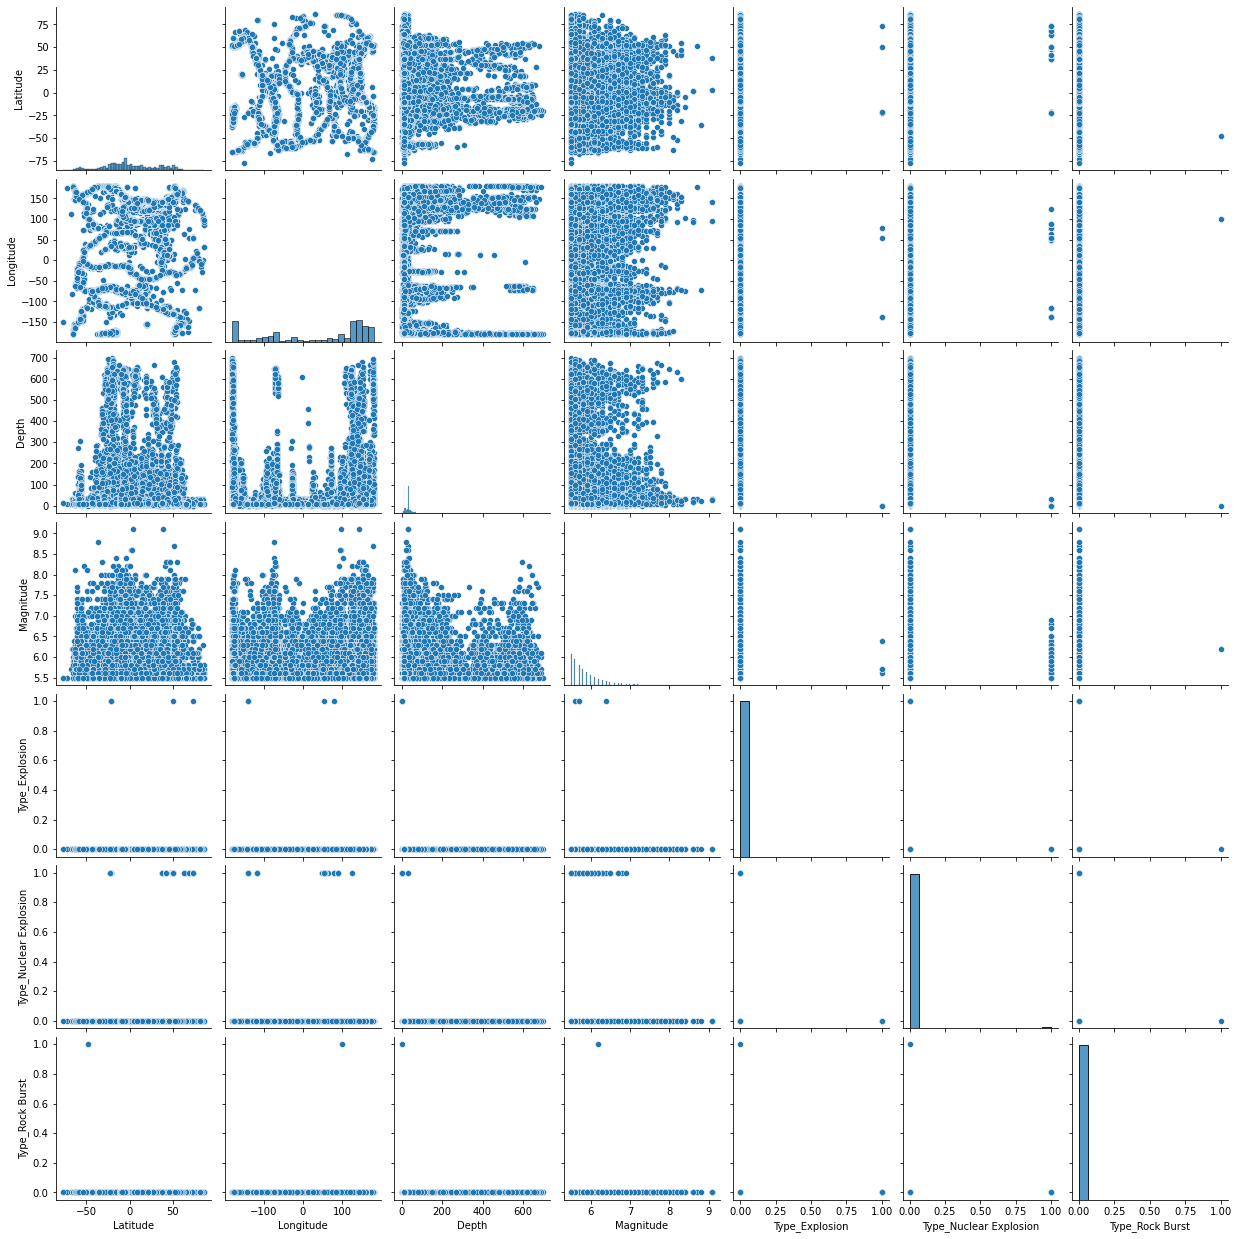

In [577]:
sns.pairplot(eq)

In [578]:
from scipy import stats 
import math

In [579]:
eq

,Date_Time,Latitude,Longitude,Depth,Magnitude,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst
0,1965-01-02 13:44:18,19.2460,145.6160,131.60,6.0,0,0,0
1,1965-01-04 11:29:49,1.8630,127.3520,80.00,5.8,0,0,0
2,1965-01-05 18:05:58,-20.5790,-173.9720,20.00,6.2,0,0,0
3,1965-01-08 18:49:43,-59.0760,-23.5570,15.00,5.8,0,0,0
4,1965-01-09 13:32:50,11.9380,126.4270,15.00,5.8,0,0,0
...,...,...,...,...,...,...,...,...
23407,2016-12-28 08:22:12,38.3917,-118.8941,12.30,5.6,0,0,0
23408,2016-12-28 09:13:47,38.3777,-118.8957,8.80,5.5,0,0,0
23409,2016-12-28 12:38:51,36.9179,140.4262,10.00,5.9,0,0,0
23410,2016-12-29 22:30:19,-9.0283,118.6639,79.00,6.3,0,0,0


In [580]:
#HypothesisTesting
#1. Null: Depth has no effect on Magnitude
#   Alternative: Depth does have an effect on Magnitude

#2. Null: Northern Latitudes do not experience larger number of Earthquakes
#   Alternative: Northern Latitudes do experience larger number of Earthquakes
#
#3. Null: Western Longitutes do not experience larger number of Earthquakes
#   Alternative: Western Longitudes do experience larger number of Earthquakes
#
#  Formal Hypothesis Testing (#1)
#

In [581]:
from scipy.stats import pearsonr
data1 = eq['Magnitude']
data2 = eq['Depth']
stat,p=pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.023, p=0.000
Probably dependent


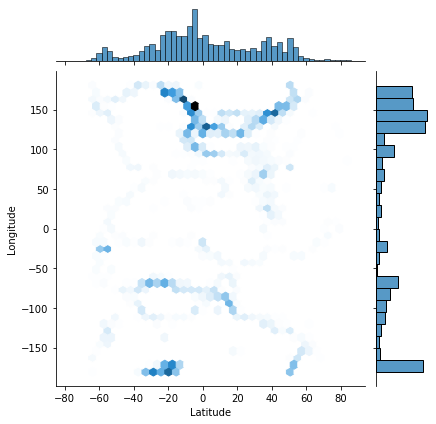

In [582]:
sns.jointplot(x=eq['Latitude'],y=eq['Longitude'],kind='hex')

In [583]:
# Create a list of float colums to check for skewing
mask = eq.dtypes == np.float
float_cols = eq.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = eq[float_cols].skew()

In [584]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Depth,3.290683
Magnitude,1.848346


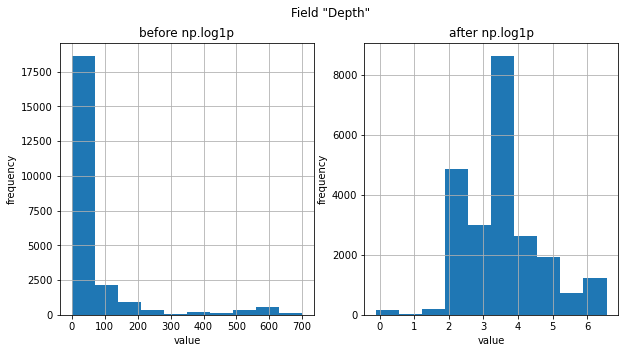

In [585]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "Depth"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
eq[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
eq[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

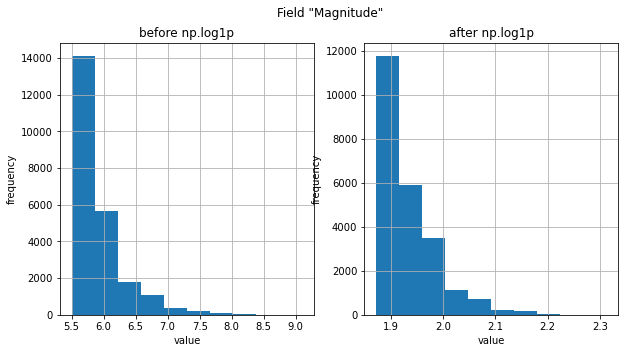

In [586]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "Magnitude"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
eq[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
eq[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [587]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    #if col == "SalePrice":
    #    continue
    eq[col] = eq[col].apply(np.log1p)

In [588]:
eq.shape

(23412, 8)

In [589]:
eq.head()

,Date_Time,Latitude,Longitude,Depth,Magnitude,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst
0,1965-01-02 13:44:18,19.246,145.616,4.887337,1.945910,0,0,0
1,1965-01-04 11:29:49,1.863,127.352,4.394449,1.916923,0,0,0
2,1965-01-05 18:05:58,-20.579,-173.972,3.044522,1.974081,0,0,0
3,1965-01-08 18:49:43,-59.076,-23.557,2.772589,1.916923,0,0,0
4,1965-01-09 13:32:50,11.938,126.427,2.772589,1.916923,0,0,0


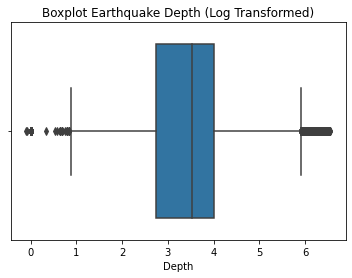

In [590]:
ax=sns.boxplot(x=eq['Depth'])
ax.set(title='Boxplot Earthquake Depth (Log Transformed)');

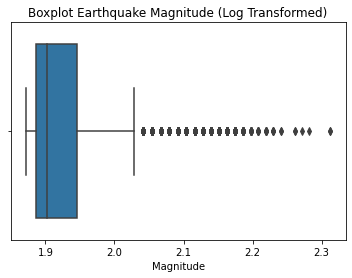

In [591]:
ax=sns.boxplot(x=eq['Magnitude'])
ax.set(title='Boxplot Earthquake Magnitude (Log Transformed)');

In [592]:
# Create a list of float colums to check for skewing
mask = eq.dtypes == np.float
float_cols = eq.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = eq[float_cols].skew()

In [593]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Magnitude,1.615419


In [594]:
#Try another method of unskewing Magnitude Distribution

In [595]:
from scipy.stats import boxcox

In [596]:
#Unskew Magnitude Distribution optimally dealing with outliers.
a,mag=stats.boxcox(eq['Magnitude'])
mag

-21.37940389801736

In [597]:
a

array([0.04677396, 0.04677395, 0.04677397, ..., 0.04677395, 0.04677397,
       0.04677392])

In [598]:
eq['Magnitude']=a

In [599]:
# Create a list of float colums to check for skewing
mask = eq.dtypes == np.float
float_cols = eq.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = eq[float_cols].skew()

In [600]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew


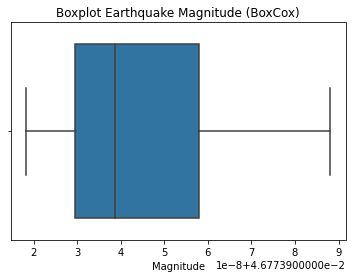

In [601]:
ax=sns.boxplot(x=eq['Magnitude'])
ax.set(title='Boxplot Earthquake Magnitude (BoxCox)');

In [602]:
eq

,Date_Time,Latitude,Longitude,Depth,Magnitude,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst
0,1965-01-02 13:44:18,19.2460,145.6160,4.887337,0.046774,0,0,0
1,1965-01-04 11:29:49,1.8630,127.3520,4.394449,0.046774,0,0,0
2,1965-01-05 18:05:58,-20.5790,-173.9720,3.044522,0.046774,0,0,0
3,1965-01-08 18:49:43,-59.0760,-23.5570,2.772589,0.046774,0,0,0
4,1965-01-09 13:32:50,11.9380,126.4270,2.772589,0.046774,0,0,0
...,...,...,...,...,...,...,...,...
23407,2016-12-28 08:22:12,38.3917,-118.8941,2.587764,0.046774,0,0,0
23408,2016-12-28 09:13:47,38.3777,-118.8957,2.282382,0.046774,0,0,0
23409,2016-12-28 12:38:51,36.9179,140.4262,2.397895,0.046774,0,0,0
23410,2016-12-29 22:30:19,-9.0283,118.6639,4.382027,0.046774,0,0,0


In [603]:
eq.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,23412.0,1.679033,3.011318e+01,-77.080000,-18.653000,-3.568500,26.190750,86.005000
Longitude,23412.0,39.639961,1.255120e+02,-179.997000,-76.349750,103.982000,145.026250,179.998000
Depth,23411.0,3.557302,1.088345e+00,-0.102033,2.742774,3.526361,4.007333,6.552508
Magnitude,23412.0,0.046774,1.980772e-08,0.046774,0.046774,0.046774,0.046774,0.046774
Type_Explosion,23412.0,0.000171,1.307022e-02,0.000000,0.000000,0.000000,0.000000,1.000000
Type_Nuclear Explosion,23412.0,0.007475,8.613503e-02,0.000000,0.000000,0.000000,0.000000,1.000000
Type_Rock Burst,23412.0,0.000043,6.535529e-03,0.000000,0.000000,0.000000,0.000000,1.000000


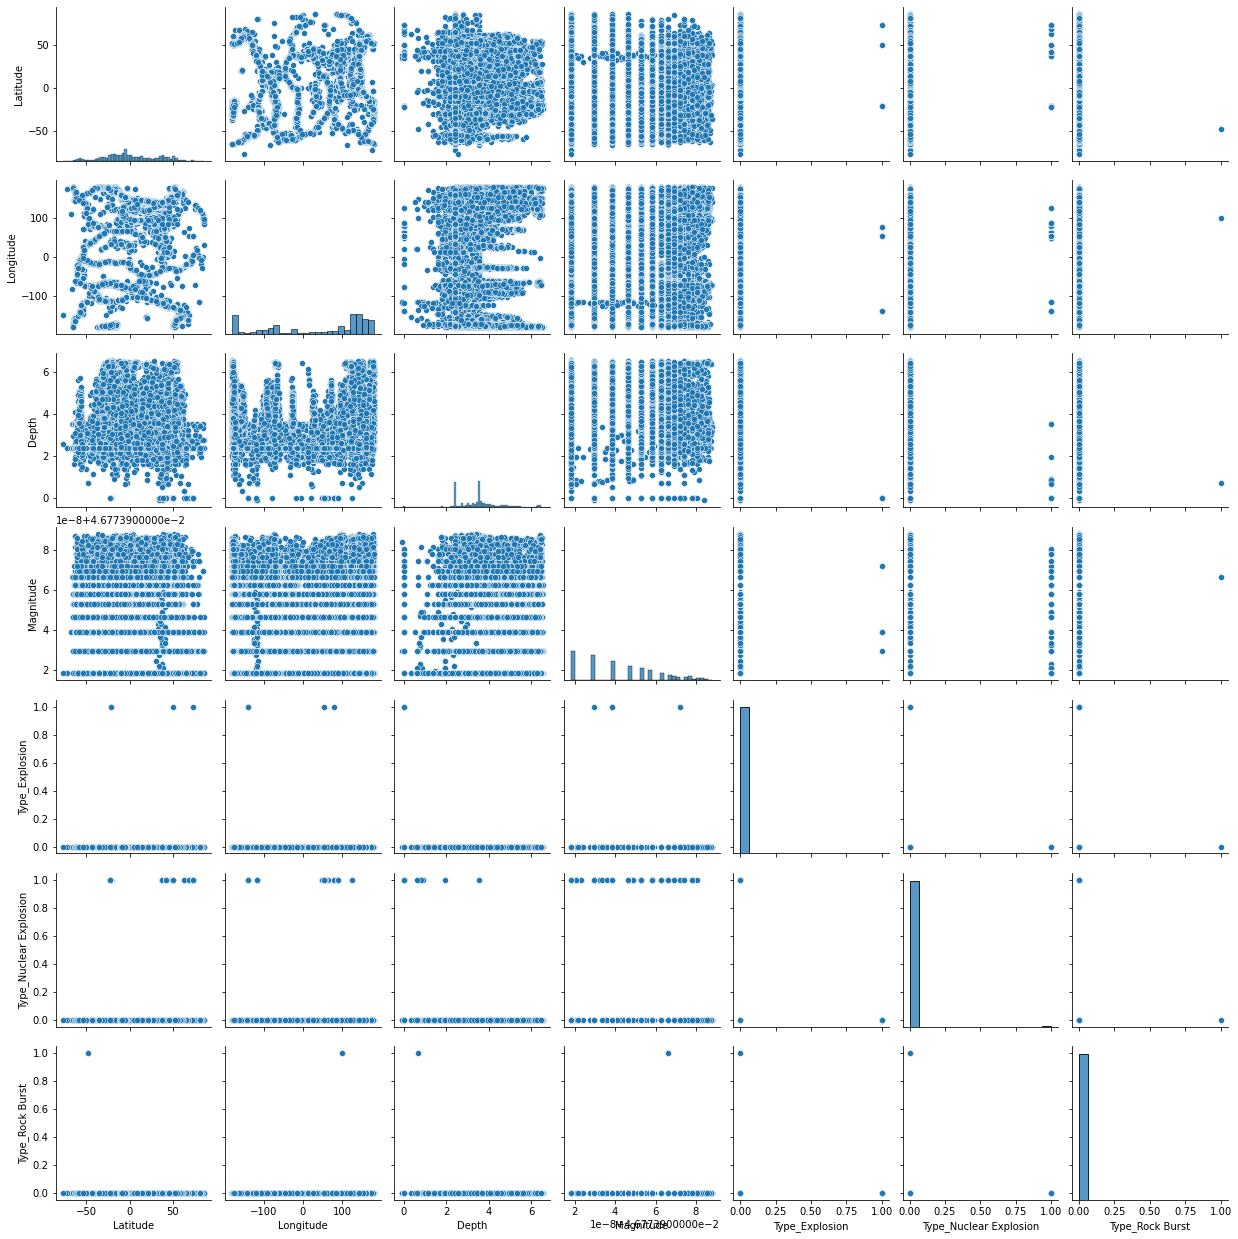

In [604]:
sns.pairplot(eq)

In [605]:
##GENERATE FEATRUE DATAFRAME SET
eq.columns

Index(['Date_Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Type_Explosion', 'Type_Nuclear Explosion', 'Type_Rock Burst'],
      dtype='object')

In [606]:
eq_ml=eq[['Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Type_Explosion', 'Type_Nuclear Explosion', 'Type_Rock Burst']]

In [607]:
eq_feature=eq[['Latitude', 'Longitude', 'Depth', 'Type_Explosion', 'Type_Nuclear Explosion', 'Type_Rock Burst']]
eq_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                23412 non-null  float64
 1   Longitude               23412 non-null  float64
 2   Depth                   23411 non-null  float64
 3   Type_Explosion          23412 non-null  uint8  
 4   Type_Nuclear Explosion  23412 non-null  uint8  
 5   Type_Rock Burst         23412 non-null  uint8  
dtypes: float64(3), uint8(3)
memory usage: 617.4 KB


In [608]:
eq_target=eq['Magnitude']

In [609]:
#Normalize Feature Set

In [610]:
from sklearn.preprocessing import StandardScaler
eq_array=np.array(eq_ml)

In [611]:
eq_array

array([[  19.246     ,  145.616     ,    4.88733708, ...,    0.        ,
           0.        ,    0.        ],
       [   1.863     ,  127.352     ,    4.39444915, ...,    0.        ,
           0.        ,    0.        ],
       [ -20.579     , -173.972     ,    3.04452244, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [  36.9179    ,  140.4262    ,    2.39789527, ...,    0.        ,
           0.        ,    0.        ],
       [  -9.0283    ,  118.6639    ,    4.38202663, ...,    0.        ,
           0.        ,    0.        ],
       [  37.3973    ,  141.4103    ,    2.56032329, ...,    0.        ,
           0.        ,    0.        ]])

In [612]:
eq_array_ss=sklearn.preprocessing.StandardScaler().fit_transform(eq_array)

In [613]:
eq_array_ss

array([[ 0.58337712,  0.84436817,  1.22209717, ..., -0.01307217,
        -0.08678187, -0.00653567],
       [ 0.00610931,  0.69884905,  0.76920916, ..., -0.01307217,
        -0.08678187, -0.00653567],
       [-0.7391616 , -1.70196151, -0.47116539, ..., -0.01307217,
        -0.08678187, -0.00653567],
       ...,
       [ 1.17023895,  0.80301824, -1.06531608, ..., -0.01307217,
        -0.08678187, -0.00653567],
       [-0.35557722,  0.62962628,  0.75779478, ..., -0.01307217,
        -0.08678187, -0.00653567],
       [ 1.18615923,  0.81085909, -0.91606977, ..., -0.01307217,
        -0.08678187, -0.00653567]])